# Parte 2

En esta segunda parte trabajaremos con información en XML. Concretamente, el gobierno
británico nos ofrece datasets sobre eventos de tráfico:

https://data.gov.uk/dataset/live-traffic-information-from-the-highways-agency-road-network

Trabajaremos con los “Unplanned Events” que se proporcionan en un formato XML. Se puede
descargar de esta URL:

http://hatrafficinfo.dft.gov.uk/feeds/datex/England/UnplannedEvent/content.xml

Concretamente, contiene un conjunto de situaciones (“situation”) y dentro de la descripción
de las situaciones, nos interesa el impacto (“impact”).

Investiga el impacto de los eventos no planificados en las variables que aporten algo de
información. Por ejemplo, la variable “capacityRemaining” indica la capacidad de la vía que
la situación dejó sin afectar, y en ocasiones indica obstrucción total (valor 0.0) pero en otros
casos sólo parcial. Estudia descriptivamente al menos 3 de las variables, sean numéricas o
categóricas, dentro de las que describen el impacto solamente.

In [28]:
# primero, las libreias a utilizar

import pandas as pd
from lxml import objectify
import datetime
import matplotlib.pyplot as plt
import scipy, pylab

In [29]:
# A continuacion vamos a importar el fichero XML UK.xml que nos hemos bajado de la dirección indicada
# Cargamos el fichero XML en memoria

%ls -l *.xml

from lxml import objectify
parsed = objectify.parse('UK.xml')
raiz = parsed.getroot()



 El volumen de la unidad C es Acer
 El n£mero de serie del volumen es: AEA3-EDCB

 Directorio de C:\Asier\MASTER\Clases\Data science Python\Entregable 2


 Directorio de C:\Asier\MASTER\Clases\Data science Python\Entregable 2

23/10/2016  18:42            24.628 UK.xml
               1 archivos         24.628 bytes
               0 dirs  1.224.206.843.904 bytes libres


In [65]:
# vamos a cargar los campos de impacto y el GUID

situation=[]
situationRecord=[]
probabilityOfOccurrence=[]
impactOnTraffic =[]
capacityRemaining=[]
numberOfLanesRestricted=[]
numberOfOperationalLanes =[]
originalNumberOfLanes = []
trafficRestrictionType = []
delayTimeValue = []
overallStartTime = []
overallEndTime = []

for row in root.payloadPublication.situation:
    situation.append(row.get('id'))
    probabilityOfOccurrence.append(row.situationRecord.probabilityOfOccurrence.text)
    impactOnTraffic.append(row.situationRecord.impact.impactOnTraffic.text)
    capacityRemaining.append(float(row.situationRecord.impact.impactDetails.capacityRemaining.text))
    numberOfLanesRestricted.append(int(row.situationRecord.impact.impactDetails.numberOfLanesRestricted.text))
    numberOfOperationalLanes.append(int(row.situationRecord.impact.impactDetails.numberOfOperationalLanes.text))
    originalNumberOfLanes.append(int(row.situationRecord.impact.impactDetails.originalNumberOfLanes.text))
    trafficRestrictionType.append( row.situationRecord.impact.impactDetails.trafficRestrictionType.text)
    delayTimeValue.append(float(row.situationRecord.impact.delays.delayTimeValue.text))
    overallStartTime.append(row.situationRecord.validity.validityTimeSpecification.overallStartTime.text)
    overallEndTime.append(row.situationRecord.validity.validityTimeSpecification.overallEndTime.text)


In [67]:

# creamos el dataframe con la información obtenida

data = pd.DataFrame()
data['situation'] = situation
data['probabilityOfOccurrence'] = probabilityOfOccurrence
data['impactOnTraffic'] = impactOnTraffic
data['capacityRemaining'] = capacityRemaining
data['numberOfLanesRestricted'] = numberOfLanesRestricted
data['numberOfOperationalLanes'] = numberOfOperationalLanes
data['originalNumberOfLanes'] = originalNumberOfLanes
data['trafficRestrictionType'] = trafficRestrictionType
data['delayTimeValue'] = delayTimeValue
data['overallStartTime'] = overallStartTime
data['overallEndTime'] = overallEndTime

# Y lo visualizamos 

data


,situation,probabilityOfOccurrence,impactOnTraffic,capacityRemaining,numberOfLanesRestricted,numberOfOperationalLanes,originalNumberOfLanes,trafficRestrictionType,delayTimeValue,overallStartTime,overallEndTime
0,GUID732336731,certain,heavy,75.0,1,3,4,carriagewayPartiallyObstructed,600.0,2015-12-03T04:11:04Z,2015-12-07T23:00:00Z
1,GUID732889125,certain,impossible,0.0,2,0,2,carriagewayBlocked,900.0,2015-12-06T17:35:05Z,2015-12-07T23:00:00Z
2,GUID732957845,certain,impossible,0.0,1,0,1,carriagewayBlocked,600.0,2015-12-07T05:12:59Z,2015-12-07T23:00:00Z
3,GUID733038589,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:48Z,2015-12-07T21:45:00Z
4,GUID733038591,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:49Z,2015-12-07T21:45:00Z
5,GUID733043648,certain,freeFlow,33.0,2,1,3,carriagewayPartiallyObstructed,0.0,2015-12-07T19:04:45Z,2015-12-07T20:15:00Z


In [117]:
# Al ser tan pocos los datoss es facil ver la relacción directa entre las variables:

# Impactontraffic - Capacity remaining - number Of Operational Lanes... 

# así seleccionamos los que tengan impacto en el traffico imposible

selec = data[data.impactOnTraffic == "impossible"]

selec

,situation,probabilityOfOccurrence,impactOnTraffic,capacityRemaining,numberOfLanesRestricted,numberOfOperationalLanes,originalNumberOfLanes,trafficRestrictionType,delayTimeValue,overallStartTime,overallEndTime
1,GUID732889125,certain,impossible,0.0,2,0,2,carriagewayBlocked,900.0,2015-12-06T17:35:05Z,2015-12-07T23:00:00Z
2,GUID732957845,certain,impossible,0.0,1,0,1,carriagewayBlocked,600.0,2015-12-07T05:12:59Z,2015-12-07T23:00:00Z
3,GUID733038589,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:48Z,2015-12-07T21:45:00Z
4,GUID733038591,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:49Z,2015-12-07T21:45:00Z


In [118]:
# seleccionamos los que tengan no carriles operativos 

selec2 = data[data.numberOfOperationalLanes == 0]

selec2

,situation,probabilityOfOccurrence,impactOnTraffic,capacityRemaining,numberOfLanesRestricted,numberOfOperationalLanes,originalNumberOfLanes,trafficRestrictionType,delayTimeValue,overallStartTime,overallEndTime
1,GUID732889125,certain,impossible,0.0,2,0,2,carriagewayBlocked,900.0,2015-12-06T17:35:05Z,2015-12-07T23:00:00Z
2,GUID732957845,certain,impossible,0.0,1,0,1,carriagewayBlocked,600.0,2015-12-07T05:12:59Z,2015-12-07T23:00:00Z
3,GUID733038589,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:48Z,2015-12-07T21:45:00Z
4,GUID733038591,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:49Z,2015-12-07T21:45:00Z


In [119]:
# y los que no tengan capacidad restante

selec3 = data[data.capacityRemaining == 0]

selec3

,situation,probabilityOfOccurrence,impactOnTraffic,capacityRemaining,numberOfLanesRestricted,numberOfOperationalLanes,originalNumberOfLanes,trafficRestrictionType,delayTimeValue,overallStartTime,overallEndTime
1,GUID732889125,certain,impossible,0.0,2,0,2,carriagewayBlocked,900.0,2015-12-06T17:35:05Z,2015-12-07T23:00:00Z
2,GUID732957845,certain,impossible,0.0,1,0,1,carriagewayBlocked,600.0,2015-12-07T05:12:59Z,2015-12-07T23:00:00Z
3,GUID733038589,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:48Z,2015-12-07T21:45:00Z
4,GUID733038591,certain,impossible,0.0,1,0,1,carriagewayBlocked,0.0,2015-12-07T18:08:49Z,2015-12-07T21:45:00Z


In [ ]:
#  vemos que en los tres casos los datos coinciden al 100% 

In [105]:

# pero bueno, vamos a demostrarlo con graficos

# empezamos por importar libreria para pintar

%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F82AE97748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F82B0610F0>]], dtype=object)

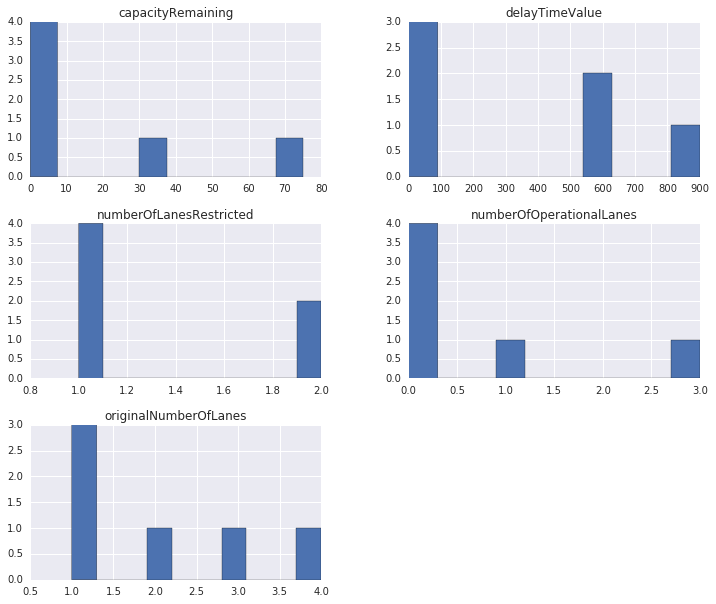

In [125]:
# en el siguiente conjunto de gáficos 

data.hist(figsize=(12,10)) 


In [ ]:
# con histogramas solo vemos el número de veces que ha aparecido un valor u otro por eso tendremos que utilizar 
# graficos que nos relacionen dos variable

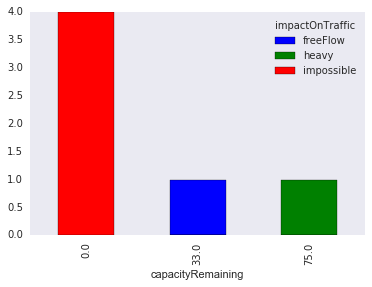

In [124]:
# Así pintamos la relacion entre capacidad restante e impacto de trafico

graf = pd.crosstab(data.capacityRemaining, data.impactOnTraffic)
graf.plot(kind='bar', stacked=True, color=['blue','green','red' ], grid=False)

In [ ]:
# vemos que cuando la capacidad es 0 , el impacto es que trafico siempre es imposible

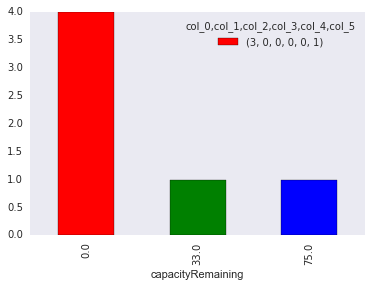

In [122]:
# Ahora pintamos la relacion entre capacidad restante y numero de carriles operativos

graf = pd.crosstab(data.capacityRemaining, numberOfOperationalLanes)
graf.plot(kind='bar', stacked=True, color=['red','green','blue' ], grid=False)

In [ ]:
# Aquí vemos que cuando el número de carriles operativos es 0, logicamente la capaccidad siempre es 0 

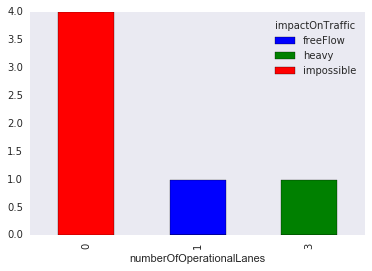

In [123]:
# Y por último pintamos la relacion entre impacto de trafico y numero de carriles operativos

graf = pd.crosstab(data.numberOfOperationalLanes, data.impactOnTraffic)
graf.plot(kind='bar', stacked=True, color=['blue','green','red' ], grid=False)

In [ ]:
# vemos que cuando el número de carriles operativos es 0 , el impacto es que trafico siempre es imposible